In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

%matplotlib inline
plt.style.use('paper.mplstyle')

In [2]:
dfres = pd.read_csv('resPratios.csv', index_col=0)
dfres.tail()

,runstring,instability_time,shadow_instability_time,Stable,Pratio21,Pratio32,beta12,beta23
113538,9045377.bin,6.990387e+05,8.267916e+05,False,2.146925,1.125825,22.762855,4.500139
113539,9045378.bin,3.075749e+08,6.576003e+08,False,1.399777,1.435985,15.316273,14.379617
113540,9045380.bin,1.193822e+07,3.363291e+07,False,1.204069,1.597688,4.036607,21.136880
113541,9045382.bin,2.064407e+08,4.316851e+07,False,1.330065,1.647766,7.294859,15.323072
113542,9045383.bin,2.266066e+04,2.228425e+04,False,1.285910,1.710886,8.965751,20.618763


In [3]:
(dfres['Stable'] == True).sum()

26437

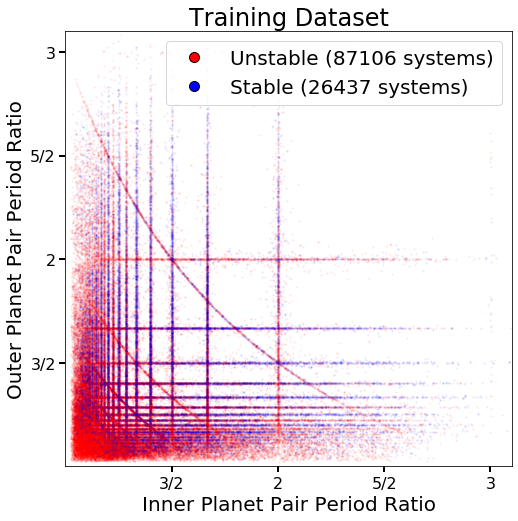

In [4]:
fig, ax2 = plt.subplots(figsize=(8,8))
stable = dfres['instability_time'] > 9.99e8
ax2.set_rasterization_zorder(1)
ax2.scatter(dfres['Pratio21'][~stable], dfres['Pratio32'][~stable], c = 'r', s=2, alpha=0.05, zorder=0)
ax2.scatter(dfres['Pratio21'][stable], dfres['Pratio32'][stable], c = 'b', s=2, alpha=0.05, zorder=0)

ax2.set_xlim([1,3.1])
ax2.set_ylim([1,3.1])
ax2.set_ylabel('Outer Planet Pair Period Ratio')
ax2.set_xlabel('Inner Planet Pair Period Ratio')
ax2.set_title('Training Dataset')

ax2.set_xticks([1.5,2.,2.5, 3.])
ax2.set_xticklabels(['3/2', '2', '5/2', '3'])
ax2.set_yticks([1.5,2.,2.5, 3.])
ax2.set_yticklabels(['3/2', '2', '5/2', '3'])


Nstable = stable.sum()
Nunstable = (~stable).sum()
legend_elements = [Line2D([0], [0], marker='o', lw=0, c='k', markerfacecolor='r', label='Unstable ({0} systems)'.format(Nunstable), markersize=10),
                   Line2D([0], [0], marker='o', lw=0, c='k', label='Stable ({0} systems)'.format(Nstable), markerfacecolor='b', markersize=10)]
ax2.legend(handles=legend_elements, loc='upper right', fontsize=20)

fig.savefig('resdataset.pdf', bbox_inches='tight', rasterized=True, dpi=300)